# Getting started

In this section, we outline the basic procedure to analyze your GWAS data with MendelIHT. 

## Installation

`MendelIHT.jl` have been tested on Julia 1.0 and 1.2 for Mac, Linus, and windows. A few features are disabled for windows users, and users will be warned when trying to use them.

Press `]` to enter package manager mode and type the following (after `pkg>`):
```
(v1.0) pkg> add https://github.com/OpenMendel/SnpArrays.jl
(v1.0) pkg> add https://github.com/OpenMendel/MendelSearch.jl
(v1.0) pkg> add https://github.com/OpenMendel/MendelBase.jl
(v1.0) pkg> add https://github.com/biona001/MendelIHT.jl
```
The order of installation is important!

## 3 Step Workflow

Most analysis consists of 3 simple steps:

1. Import data.
2. Run cross validation: either `cv_iht` or `cv_iht_distribute_folds` to determine best model size.
3. Run `L0_reg` to obtain final model.

We believe the best way to learn is through examples. Head over to the example section on the left to see these steps in action. Nevertheless, below contains function signatures and use cautions that any users should be aware. 

!!! note

    (1) `MendelIHT` assumes there are **NO missing genotypes**, and (2) the trios (`.bim`, `.bed`, `.fam`) must all be present in the same directory. 

## Core Functions

A standard analysis runs only 2 functions, other than importing data. For testing small problems (small number of folds), we recommend using `cv_iht`. This function cycles through the testing sets sequentially and fits different sparsity models in parallel. For larger problems where `L0_reg` takes a long time to run, one can instead run `cv_iht_distribute_fold`. This function fits different sparsity models sequentially but initializes all training/testing model in parallel, which consumes more memory (see below). The later strategy allows one to distribute different sparsity parameters to different computers, achieving greater parallel power. 

```@docs
  cv_iht
```   

```@docs
  cv_iht_distribute_fold
```   

!!! note 

    **Do not** delete intermediate files with random file names created by `cv_iht` and `cv_iht_distribute_fold` (windows users will be instructed to manually do so via print statements). These are memory-mapped files necessary for cross validation. For `cv_iht`, **you must have `x` GB of free space and RAM on your hard disk** where `x` is your `.bed` file size. For `cv_iht_distribute_fold`, you must have enough RAM and disk space to fit all `q` training datasets simultaneously, each of which typically requires `(q - 1)/q * x` GB. 


```@docs
  L0_reg
```

## Supported GLM models and Link functions

MendelIHT borrows distribution and link functions implementationed in [GLM.jl](http://juliastats.github.io/GLM.jl/stable/) and [Distributions.jl](https://juliastats.github.io/Distributions.jl/stable/)

Distributions (listed with their canonical link) that work with `L0_reg` and `cv_iht` are:

              Normal (IdentityLink)
           Bernoulli (LogitLink)
             Poisson (LogLink)
    NegativeBinomial (LogLink)
               Gamma (InverseLink) **(not tested)**
     InverseGaussian (InverseSquareLink) **(not tested)**

Examples of these distributions in their default value (code from [this post](https://github.com/JuliaStats/GLM.jl/issues/289)):

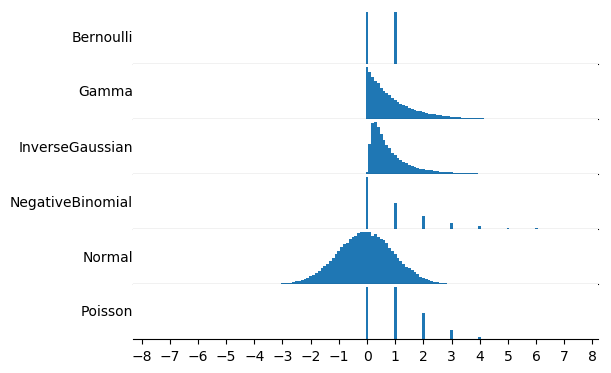

In [2]:
using Distributions, PyPlot
figure(figsize=(6,5))
dfxs = [Bernoulli(),Gamma(),InverseGaussian(),NegativeBinomial(),Normal(),Poisson()]
dnames = ["Bernoulli","Gamma","InverseGaussian","NegativeBinomial","Normal","Poisson"]
for i in 1:length(dfxs)
    subplot(7,1,i); subplots_adjust(hspace=0)
    PyPlot.plt.hist(rand(dfxs[i], 100000),-7.5:0.1:7.5,align="left",label="x");xticks(-8:8)
    ax= gca()
    ax.yaxis.set_visible(false);ax.spines["left"].set_visible(false);ax.spines["right"].set_visible(false);ax.spines["top"].set_visible(false)
    i !== length(dfxs) && ax.xaxis.set_visible(false);annotate(dnames[i],xy=[0,0.5],xycoords="axes fraction",ha="right",va="center")
end

Available link functions are:

    CauchitLink
    CloglogLink
    IdentityLink
    InverseLink
    InverseSquareLink
    LogitLink
    LogLink
    ProbitLink
    SqrtLink
    
!!! tip
    
    For logistic regression, the `ProbitLink` seems to work better than `LogitLink`. For `d = NegativeBinomial` or `d=Gamma`, the link function must be `LogLink`. 

## Specifying Groups and Weights

When you have group and weight information, you input them as optional arguments in `L0_reg` and `cv_iht`. The weight vector is a vector of Float64, while the group vector is a vector of integers. For instance,

```Julia
    g = #import group vector
    w = #import weight vector
    J = length(unique(g)) # specify number of non-zero groups
    result = L0_reg(x, xbm, z, y, J, k, d(), l, group=g, weight=w)
```

## Simulation Utilities

MendelIHT provides some simulation utilities that help users explore the function and capabilities of iterative hard thresholding. 

```@docs
  simulate_random_snparray
```

```@docs
  simulate_correlated_snparray
```

!!! note
    Simulating a SnpArray with $n$ subjects and $p$ SNPs requires up to $4np$ bits of RAM. Make sure you have enough RAM before simulating very large SnpArrays.

```@docs
  simulate_random_response
```

!!! note
    For negative binomial and gamma, the link function must be LogLink. For Bernoulli, the probit link seems to work better than logitlink when used in `cv_iht` or `L0_reg`. 

```@docs
  adhoc_add_correlation
```

```@docs
  make_bim_fam_files
```

## Other Useful Functions

MendelIHT additionally provides useful utilities that may be of interest to a few advanced users. 

```@docs
  iht_run_many_models
```

```@docs
  loglikelihood
```

```@docs
  project_k!
```

```@docs
  project_group_sparse!
```

```@docs
  maf_weights
```

```@docs
  naive_impute
```